In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
"""Intializes 297 points around 0,0 in x-y plane in data frame df"""
R_min = 25 # in kpc
M = 1 #in 10^11 solar masses

R = []
T = []
for i in range(11):
    T.append(12+3*i)
    R.append((.2 + i*(.05))*R_min )
    
def rtpairs(r, n):

    df = pd.DataFrame(columns=['X', 'Y'])
    for i in range(len(r)):
        for j in range(n[i]):    
            df = df.append({'X': r[i] * np.cos(j*(2 * np.pi / n[i])),
                            'Y': r[i] * np.sin(j*(2 * np.pi / n[i]))},
                           ignore_index=True)
    return df

df = rtpairs(R, T)
df['Z'] = np.zeros(297)




/tmp/ipykernel_5080/472406771.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'X': r[i] * np.cos(j*(2 * np.pi / n[i])),
/tmp/ipykernel_5080/472406771.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'X': r[i] * np.cos(j*(2 * np.pi / n[i])),
/tmp/ipykernel_5080/472406771.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'X': r[i] * np.cos(j*(2 * np.pi / n[i])),
/tmp/ipykernel_5080/472406771.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'X': r[i] * np.cos(j*(2 * np.pi / n[i])),
/tmp/ipykernel_5080/472406771.py:16: FutureWarning: The frame.append method is d

In [3]:
def v_0(x, y, M):
    """Velocity Function in 2d
    r^2 = x^2 + y^2 from mass M
    """
    G = 4491.9 # kpc^3 / (M * T^2) where M = 10^11 solar masses and T = 10^8 years
    e_soft = .3  #softing parameter  
    r = np.sqrt(x**2 + y ** 2)
    v = np.sqrt( (G*M*r / (r ** 2 + e_soft**2 )  ) )
    theta = np.arccos(x/r)
    vy = v*np.cos(theta)
    theta = np.arcsin(y/r)
    vx = -v*np.sin(theta) 

    return [vx,vy]


df['V_x'] , df['V_y'] = v_0(df['X'],df['Y'],M) #velocity for ring points
df['V_z'] = np.zeros(297)

In [4]:
"""Graphing vector field to check velocity for flat disk no inclination at (0,0,0)
    Visual aid, this cell is not needed
"""
fig = go.Figure(data = go.Cone(
    x = df['X'],
    y = df['Y'],
    z = df['Z'],
    u = df['V_x'],
    v = df['V_y'],
    w = df['V_z'],
    colorscale = 'Blues',
    sizemode = "absolute",
    sizeref = 40))

fig.update_layout(
    scene = dict(aspectratio = dict(x = 1, y = 1, z = 0.8),
    camera_eye = dict(x = 1.2, y = 1.2, z = 0.6)))

fig.show()

In [5]:
"""Rotates df by inclincation angles 15 for gal A and 60 for gal B of rings into df_ringA and df_ringB
    Both gal A and gal B are still centered at (0,0,0)
"""
##Rotation for Galaxy A
theta = np.radians(15)
rot_matrix = np.array([[1, 0, 0],
                       [0, np.cos(theta), -np.sin(theta)],
                       [0, np.sin(theta), np.cos(theta)]])
df_ringA = pd.DataFrame(columns=['X', 'Y','Z','V_x','V_y','V_z'])
df_ringB = pd.DataFrame(columns=['X', 'Y','Z','V_x','V_y','V_z'])


df_ringA['X'], df_ringA['Y'], df_ringA['Z'] = rot_matrix.dot([df['X'],df['Y'],df['Z']])
df_ringA['V_x'], df_ringA['V_y'], df_ringA['V_z'] = rot_matrix.dot([df['V_x'],df['V_y'],df['V_z']])


## Rotation for galaxy B
theta = np.radians(60)
rot_matrix = np.array([[1, 0, 0],
                       [0, np.cos(theta), -np.sin(theta)],
                       [0, np.sin(theta), np.cos(theta)]])
df_ringB['X'], df_ringB['Y'], df_ringB['Z'] = rot_matrix.dot([df['X'],df['Y'],df['Z']])
df_ringB['V_x'], df_ringB['V_y'], df_ringB['V_z'] = rot_matrix.dot([df['V_x'],df['V_y'],df['V_z']])


In [6]:
"""Intializes Central Mass of Gal A and B in 2d pos and vel, 
    Path should look like theortical plot at the end
"""
df_mass = pd.DataFrame(columns=['X', 'Y','Z','V_x','V_y','V_z'])
df_mass = pd.DataFrame(columns=['X', 'Y','Z','V_x','V_y','V_z'])
vxA, vyA = v_0(-50,-50,2*M)
vxB, vyB = v_0(50,50,2*M)
df_mass.loc[0] = [-50,-50,0,vxA,-vyA,0]
df_mass.loc[1] = [50,50,0,vxB,-vyB,0]

print(df_mass)

      X     Y    Z        V_x        V_y  V_z
0 -50.0 -50.0  0.0  78.970909  78.970909  0.0
1  50.0  50.0  0.0 -78.970909 -78.970909  0.0


In [7]:
"""Shifts rings by their respective central masses position and velocity

"""

df_ringA['X'] = df_ringA['X'] - 50
df_ringA['Y'] = df_ringA['Y'] - 50
df_ringA['V_x'] = df_ringA['V_x'] + vxA
df_ringA['V_y'] = df_ringA['V_y'] + vyA

df_ringB['X'] = df_ringB['X'] + 50
df_ringB['Y'] = df_ringB['Y'] + 50
df_ringB['V_x'] = df_ringB['V_x'] + vxB
df_ringB['V_y'] = df_ringB['V_y'] + vyB


## The rest of this notebook are plots to visual intialization

df_mass has gal center A in its first index and gal center B in its second <br>
df_ringA is rings on A <br>
df_ringB is rings on B <br>
df_ringcomp is ringB appended to ringA

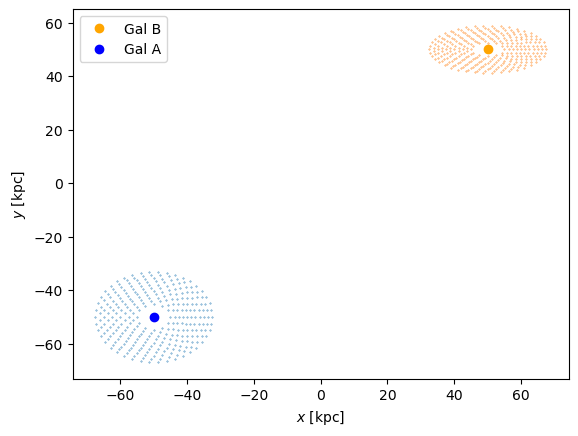

In [8]:
plt.scatter(df_ringA['X'],df_ringA['Y'],s=0.1)
plt.scatter(df_ringB['X'],df_ringB['Y'],s=0.1)
plt.plot(50,50,'o',c='orange',label='Gal B')
plt.plot(-50,-50,'o',c='blue',label='Gal A')
plt.xlabel(r'$x$ [kpc]')
plt.ylabel(r'$y$ [kpc]')
plt.legend()

In [9]:
"""Graphs Vector Field of df_ringcomp
    Pretty sure like matplotlib, plotly.graph_objects has some distortions. Have checked the radius of both galaxies
    and both are still .7R_min
"""
#Composite data from of rings
df_ringcomp = df_ringA.append(df_ringB, ignore_index=True) 
fig = go.Figure(data = go.Cone(
    x = df_ringcomp['X'],
    y = df_ringcomp['Y'],
    z = df_ringcomp['Z'],
    u = df_ringcomp['V_x'],
    v = df_ringcomp['V_y'],
    w = df_ringcomp['V_z'],
    colorscale = 'Blues',
    sizemode = "absolute",
    sizeref = 400))

fig.update_layout(
    scene = dict(aspectratio = dict(x = 1, y = 1, z = 0.8),
    camera_eye = dict(x = 1.2, y = 1.2, z = 0.6)))

fig.show()


/tmp/ipykernel_5080/2127412424.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Text(0.5, 0, '$z$ [kpc]')

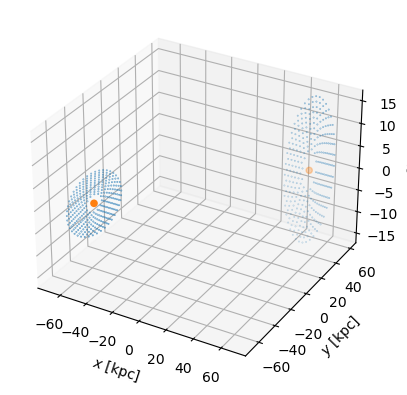

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_ringcomp['X'], df_ringcomp['Y'], df_ringcomp['Z'], s=0.1)
ax.scatter(df_mass['X'],df_mass['Y'],df_mass['Z'],'o')
ax.set_xlabel(r'$x$ [kpc]')
ax.set_ylabel(r'$y$ [kpc]')
ax.set_zlabel(r'$z$ [kpc]')

'-50,-50 is found to be gal A intial position and 50,50 is gal B'

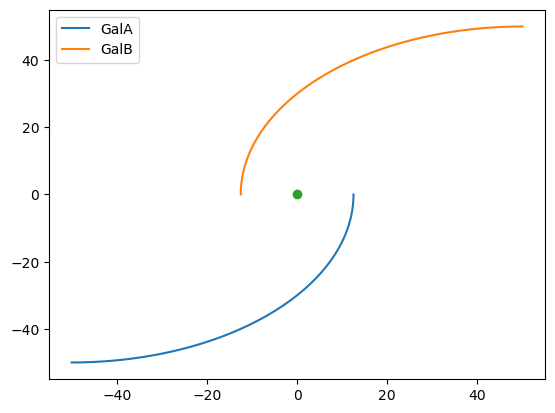

In [11]:
"""Therotical Setup in 2d 
    None of the variables or data frames from previous cells is used here. This cell was used to find the
    intial distances between the two galaxies relative to center of mass
"""
e = .6 # eccentricity
a = 25 / (.4) # in kpc
def int_cen_orbit (theta):
    return a*(1-e**2)/(1-e*np.cos(theta))

tmp_theta = np.linspace(-np.pi,0,10001) #Half an ellispe
Ar_orbit = int_cen_orbit(tmp_theta)
x_A = Ar_orbit*np.cos(tmp_theta)
y_A = Ar_orbit*np.sin(tmp_theta)
tmp_theta = np.linspace(0,np.pi,10001)
Br_orbit = int_cen_orbit(tmp_theta)
x_B = Br_orbit*np.cos(tmp_theta)
y_B = Br_orbit*np.sin(tmp_theta)

#shifting ellispe A and B so Center of Mass is (0,0)
x_A = x_A - 87.5 
x_B = x_B + 100 - 87.5

#ploting at 90 degrees of node, quarter of ellipse
i_A = int(np.where(y_A == np.min(y_A))[0])
plt.plot(x_A[i_A::],y_A[i_A::],label='GalA')

i_B = int(np.where(y_B == np.max(y_B))[0])
plt.plot(x_B[i_B::],y_B[i_B::],label='GalB')
plt.legend()
plt.plot(0,0,'o')
"""-50,-50 is found to be gal A intial position and 50,50 is gal B"""

In [12]:
print(df_mass)

      X     Y    Z        V_x        V_y  V_z
0 -50.0 -50.0  0.0  78.970909  78.970909  0.0
1  50.0  50.0  0.0 -78.970909 -78.970909  0.0


In [13]:
print(df_ringA)

             X          Y         Z         V_x         V_y           V_z
0   -45.000000 -50.000000  0.000000   78.970909   50.592838  3.471650e+01
1   -45.669873 -47.585185  0.647048   11.903779   33.234587  3.006537e+01
2   -47.500000 -45.817418  1.120719  -37.192768  -14.189036  1.735825e+01
3   -50.000000 -45.170371  1.294095  -55.163352  -78.970909  2.125773e-15
4   -52.500000 -45.817418  1.120719  -37.192768 -143.752783 -1.735825e+01
..         ...        ...       ...         ...         ...           ...
292 -37.171592 -61.497437 -3.080729  173.649391   19.591327  2.640967e+01
293 -35.540821 -59.522194 -2.551464  157.383766   32.120740  2.976692e+01
294 -34.233045 -57.334241 -1.965204  139.366528   42.168549  3.245922e+01
295 -33.277476 -54.982454 -1.335044  120.000152   49.510302  3.442644e+01
296 -32.695461 -52.519366 -0.675062   99.717250   53.981998  3.562462e+01

[297 rows x 6 columns]


In [14]:
print(df_ringB)

             X          Y          Z         V_x         V_y           V_z
0    55.000000  50.000000   0.000000  -78.970909  146.038040  1.161637e+02
1    54.330127  51.250000   2.165064 -146.038040  137.052748  1.006007e+02
2    52.500000  52.165064   3.750000 -195.134587  112.504475  5.808184e+01
3    50.000000  52.500000   4.330127 -213.105170   78.970909  7.112974e-15
4    47.500000  52.165064   3.750000 -195.134587   45.437344 -5.808184e+01
..         ...        ...        ...         ...         ...           ...
292  62.828408  44.048489 -10.308320   15.707572  129.990477  8.836848e+01
293  64.459179  45.070949  -8.537366   -0.558052  136.476178  9.960205e+01
294  65.766955  46.203517  -6.575701  -18.575290  141.677307  1.086107e+02
295  66.722524  47.420892  -4.467146  -37.941667  145.477678  1.151931e+02
296  67.304539  48.695880  -2.258802  -58.224568  147.792398  1.192023e+02

[297 rows x 6 columns]


In [15]:
print(df_ringcomp)

             X          Y          Z        V_x         V_y           V_z
0   -45.000000 -50.000000   0.000000  78.970909   50.592838  3.471650e+01
1   -45.669873 -47.585185   0.647048  11.903779   33.234587  3.006537e+01
2   -47.500000 -45.817418   1.120719 -37.192768  -14.189036  1.735825e+01
3   -50.000000 -45.170371   1.294095 -55.163352  -78.970909  2.125773e-15
4   -52.500000 -45.817418   1.120719 -37.192768 -143.752783 -1.735825e+01
..         ...        ...        ...        ...         ...           ...
589  62.828408  44.048489 -10.308320  15.707572  129.990477  8.836848e+01
590  64.459179  45.070949  -8.537366  -0.558052  136.476178  9.960205e+01
591  65.766955  46.203517  -6.575701 -18.575290  141.677307  1.086107e+02
592  66.722524  47.420892  -4.467146 -37.941667  145.477678  1.151931e+02
593  67.304539  48.695880  -2.258802 -58.224568  147.792398  1.192023e+02

[594 rows x 6 columns]


(-60.0, 60.0)

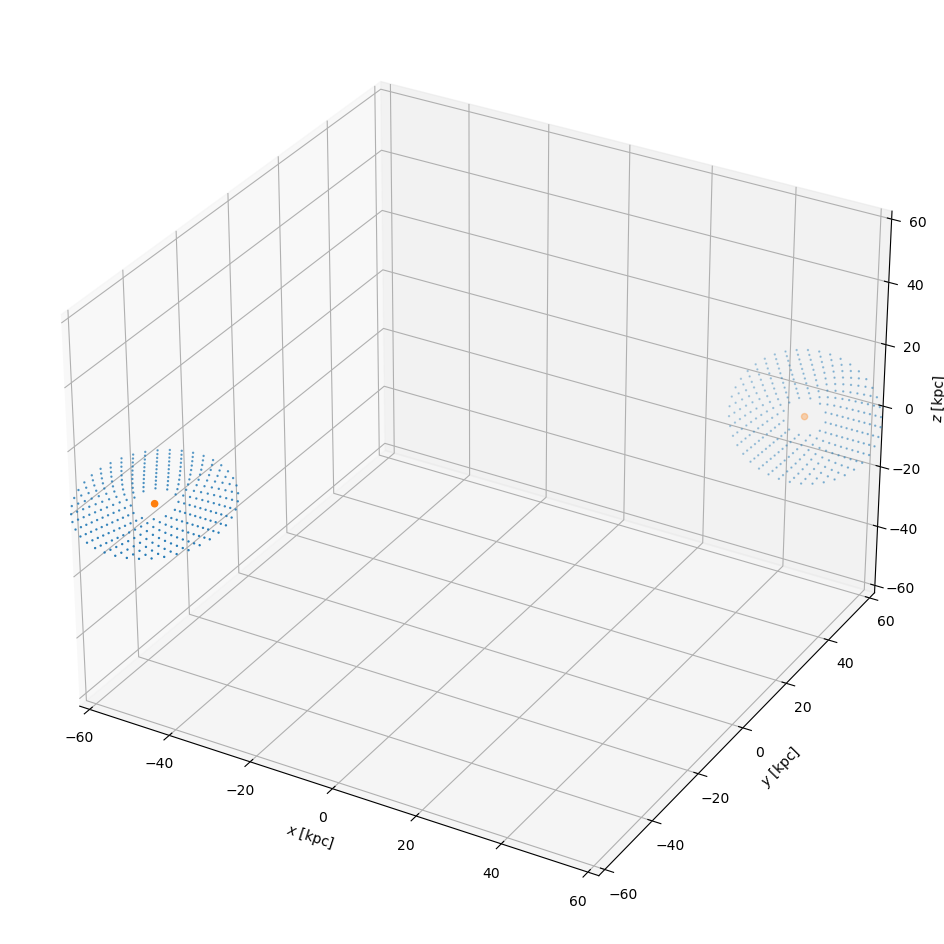

In [20]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_ringcomp['X'], df_ringcomp['Y'], df_ringcomp['Z'], s=0.5)
ax.scatter(df_mass['X'],df_mass['Y'],df_mass['Z'],'o')
ax.set_xlabel(r'$x$ [kpc]')
ax.set_ylabel(r'$y$ [kpc]')
ax.set_zlabel(r'$z$ [kpc]')
ax.set_xlim(-60,60)

ax.set_ylim(-60,60)
ax.set_zlim(-60,60)

In [21]:
df_ringcomp.to_csv('comp.csv', index=False)
df_mass.to_csv('mass.csv', index=False)